# Understand Brazilian E-commerce co.



In [131]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
import datetime as dt

In [132]:
ls

EDA.ipynb                              olist_order_payments_dataset.csv*
README.md                              olist_order_reviews_dataset.csv*
Untitled.ipynb                         olist_orders_dataset.csv*
brazilian-ecommerce/                   olist_products_dataset.csv*
olist_customers_dataset.csv*           olist_sellers_dataset.csv*
olist_geolocation_dataset.csv*         product_category_name_translation.csv*
olist_order_items_dataset.csv*


In [139]:
df = pd.read_csv('olist_orders_dataset.csv', index_col=0, parse_dates=['order_purchase_timestamp'])
              
product = pd.read_csv("product_category_name_translation.csv")
customer = pd.read_csv("olist_customers_dataset.csv")
review = pd.read_csv("olist_order_reviews_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
payment = pd.read_csv("olist_order_payments_dataset.csv")
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()
                    

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [100]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [101]:
stat_cat = df['order_status'].unique().tolist()
stat_cat

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [102]:
status_cat = pd.Categorical(df['order_status'], categories=stat_cat, ordered=False)
status_cat
                           

[delivered, delivered, delivered, delivered, delivered, ..., delivered, delivered, delivered, delivered, delivered]
Length: 99441
Categories (8, object): [delivered, invoiced, shipped, processing, unavailable, canceled, created, approved]

In [103]:
#reassign status_cat to original "order_Status col
df['order_status'] = status_cat

In [104]:
#do the same to product_name_category

cat_name = product['product_category_name'].unique().tolist()
product['product_category_name'] = pd.Categorical(product['product_category_name'], categories=cat_name, ordered=False)
product['product_category_name'].describe()

count                     71
unique                    71
top       seguros_e_servicos
freq                       1
Name: product_category_name, dtype: object

In [105]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null category
product_category_name_english    71 non-null object
dtypes: category(1), object(1)
memory usage: 3.8+ KB


In [106]:
#capitalize first character of each word
customer['customer_city'] = customer['customer_city'].str.title()
customer['customer_state'] = customer['customer_state'].str.upper()
customer['customer_state'].value_counts().head(7)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
Name: customer_state, dtype: int64

In [107]:
review['review_comment_title'] = review['review_comment_title'].str.strip().str.lower()

In [108]:
product['product_category_name_english'][1]

'computers_accessories'

In [109]:
#replace underline w/ spaces
product['product_category_name_english'] = product['product_category_name_english'].str.replace('_',' ').str.lower()
product['product_category_name_english'].value_counts().head(13)

watches gifts                        1
health beauty                        1
cool stuff                           1
fashion male clothing                1
small appliances                     1
home comfort 2                       1
bed bath table                       1
stationery                           1
auto                                 1
books technical                      1
party supplies                       1
agro industry and commerce           1
furniture mattress and upholstery    1
Name: product_category_name_english, dtype: int64

In [110]:
to_eng_cat_name = product['product_category_name_english'].unique().tolist()
to_eng_cat_name[0]

'health beauty'

In [111]:
orders['order_estimated_delivery_date']# - orders['order_delivered_customer_date']

0        2017-10-18 00:00:00
1        2018-08-13 00:00:00
2        2018-09-04 00:00:00
3        2017-12-15 00:00:00
4        2018-02-26 00:00:00
5        2017-08-01 00:00:00
6        2017-05-09 00:00:00
7        2017-06-07 00:00:00
8        2017-03-06 00:00:00
9        2017-08-23 00:00:00
10       2017-06-07 00:00:00
11       2017-08-08 00:00:00
12       2018-07-18 00:00:00
13       2018-08-08 00:00:00
14       2018-03-21 00:00:00
15       2018-07-04 00:00:00
16       2018-02-06 00:00:00
17       2018-01-29 00:00:00
18       2017-12-11 00:00:00
19       2017-11-23 00:00:00
20       2017-09-28 00:00:00
21       2018-03-29 00:00:00
22       2018-02-21 00:00:00
23       2018-02-21 00:00:00
24       2018-08-17 00:00:00
25       2018-03-12 00:00:00
26       2018-07-18 00:00:00
27       2018-03-28 00:00:00
28       2018-05-23 00:00:00
29       2018-04-13 00:00:00
                ...         
99411    2018-07-31 00:00:00
99412    2017-12-15 00:00:00
99413    2018-04-19 00:00:00
99414    2017-

In [112]:
#import datetimenow = datetime.date.toda
                                          

                   
#(orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']).describe()

import datetime
now = datetime.date.today()
today = '{0:%m/%d/%Y}'.format(now).format(now)
today
data['Aging'] = today
data['Aging'] = data['Aging'].sub(data['Created_Date'], axis=0)

                                                               

In [112]:
#orders.describe()
#orders.info()
orders.Series)dtype

In [73]:
#orders.info()
#orders.dtypes
#orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']
orders['order_estimated_delivery_date'].astype('int)

In [73]:
df2 = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce').fillna(0)
df3 = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce').fillna(0)

In [73]:
df3 - df2

In [73]:
df2 = orders['order_estimated_delivery_date'].values.astype('datetime64[D]')

#speed['reached_time'] = pd.to_timedelta(speed['reached_time'])
#speed['created_time'] = pd.to_datetime(speed['created_time'])
orders['order_estimated_delivery_date'] = pd.to_timedelta(orders['order_estimated_delivery_date'])
orders['order_delivered_customer_date'] = pd.to_timedelta(orders['order_delivered_customer_date'])

In [73]:
speed['created_time'].dt.time - speed['reached_time']

In [73]:
import pandas as pd

speed = pd.DataFrame(
    {'created_time': 
     ['2016-01-02 12:57:44', '2016-01-02 12:57:44', '2016-01-03 10:38:51',
      '2016-01-03 10:38:51', '2016-01-03 10:38:52', '2016-01-03 10:38:52',
      '2016-01-03 10:38:52', '2016-01-03 10:38:52', '2016-01-03 10:38:52'],
     'reached_time': 
     ['14:20:22', '13:01:38', '12:24:07', '12:32:11', '12:23:20', 
      '12:51:34', '12:53:33', '13:04:08', '13:13:40']})
speed['reached_time'] = pd.to_timedelta(speed['reached_time'])
speed['created_time'] = pd.to_datetime(speed['created_time'])

dates = speed['created_time'].values.astype('datetime64[D]')

speed['reached_date'] = dates + speed['reached_time'].values
speed['diff'] = speed['created_time'] - speed['reached_date']

# alternatively
# speed['created_delta'] = speed['created_time'].values - dates
# speed['diff'] = speed['created_delta'] - speed['reached_time']

print(speed)

In [113]:
((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']) / (np.timedelta64(1, 'D'))).plot(kind='hist', bins=50)

In [116]:
df1 = orders['order_estimated_delivery_date'].dropna()
df2 = orders['order_delivered_customer_date'].dropna()
#order_estimated_delivery_date'] - orders['order_delivered_customer_date']

#orders['Difference'] = orders['order_estimated_delivery_date'].sub(orders['order_delivered_customer_date'], axis=0)
#df_test.head()  
#print(orders['order_delivered_customer_date'])
#print(orders['order_estimated_delivery_date'])


In [127]:
#This took me too long to understand.
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])#make the columns into datetime.
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

orders["duration_in_days"] = (orders["order_estimated_delivery_date"] - orders["order_delivered_customer_date"])/np.timedelta64(1, 'D')
#subtract estimated delivery by actual date received



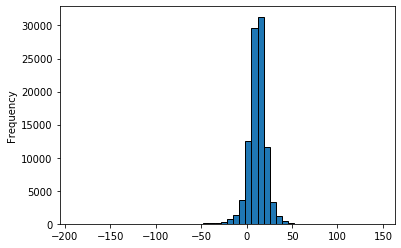

In [125]:
orders['duration_in_days'].plot(kind='hist', bins=50)

In [126]:
orders['on_time'] = ((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'])/(np.timedelta64(1, 'D')))

In [146]:
order_items['total_value'] = order_items['price'].add(order_items['freight_value']) #create new column with price & freight included




In [148]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [150]:
order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,140.644059
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,190.724394
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,6.080000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,55.220000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,92.320000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,157.937500
